In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

import pandas as pd
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 20000)


In [2]:
df = pd.read_csv('Cleaned_df.csv') 

In [3]:
df.head()

,id,title,vote_average,popularity,tags
0,19995,Avatar,7.2,150.437577,samworthington zoesaldana sigourneyweaver step...
1,285,Pirates of the Caribbean: At World's End,6.9,139.082615,johnnydepp orlandobloom keiraknightley stellan...
2,206647,Spectre,6.3,107.376788,danielcraig christophwaltz laseydoux ralphfien...
3,49026,The Dark Knight Rises,7.6,112.312950,christianbale michaelcaine garyoldman annehath...
4,49529,John Carter,6.1,43.926995,taylorkitsch lynncollins samanthamorton willem...


# Popularity-Based Recommender System

In [4]:
data = df.copy()
data.head()

,id,title,vote_average,popularity,tags
0,19995,Avatar,7.2,150.437577,samworthington zoesaldana sigourneyweaver step...
1,285,Pirates of the Caribbean: At World's End,6.9,139.082615,johnnydepp orlandobloom keiraknightley stellan...
2,206647,Spectre,6.3,107.376788,danielcraig christophwaltz laseydoux ralphfien...
3,49026,The Dark Knight Rises,7.6,112.312950,christianbale michaelcaine garyoldman annehath...
4,49529,John Carter,6.1,43.926995,taylorkitsch lynncollins samanthamorton willem...


In [5]:
sorted_data = data.sort_values(by='popularity', ascending=False)
top_10_popular_movies = sorted_data.iloc[:10]
top_10_popular_movies

,id,title,vote_average,popularity,tags
546,211672,Minions,6.4,875.581305,sandrabullock jonhamm michaelkeaton allisonjan...
95,157336,Interstellar,8.1,724.247784,matthewmcconaughey jessicachastain annehathawa...
788,293660,Deadpool,7.4,514.569956,ryanreynolds morenabaccarin edskrein tjmiller ...
94,118340,Guardians of the Galaxy,7.9,481.098624,chrispratt zoesaldana davebautista vindiesel b...
127,76341,Mad Max: Fury Road,7.2,434.278564,tomhardy charlizetheron nicholashoult hughkeay...
28,135397,Jurassic World,6.5,418.708552,chrispratt brycedallashoward irrfankhan vincen...
199,22,Pirates of the Caribbean: The Curse of the Bla...,7.5,271.972889,johnnydepp geoffreyrush orlandobloom keiraknig...
82,119450,Dawn of the Planet of the Apes,7.3,243.791743,andyserkis jasonclarke garyoldman kerirussell ...
200,131631,The Hunger Games: Mockingjay - Part 1,6.6,206.227151,jenniferlawrence joshhutcherson liamhemsworth ...
88,177572,Big Hero 6,7.8,203.734590,scottadsit ryanpotter danielhenney tjmiller ja...


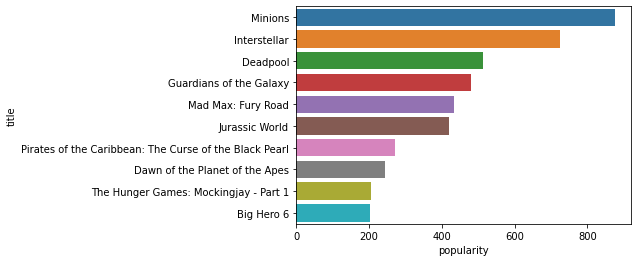

In [6]:
sns.barplot(y='title',x='popularity',data=top_10_popular_movies);

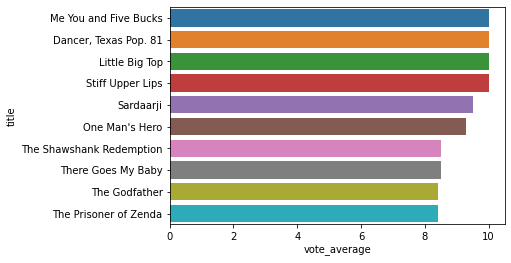

In [7]:
sorted_data = data.sort_values(by='vote_average', ascending=False)
top_10_popular_movies_va = sorted_data.iloc[:10]
sns.barplot(y='title',x='vote_average',data=top_10_popular_movies_va);

# Content-Based Recommender System

In [8]:
import pandas as pd
import seaborn as sns
import numpy

df = pd.read_csv('Cleaned_df.csv') 
df.head()

,id,title,vote_average,popularity,tags
0,19995,Avatar,7.2,150.437577,samworthington zoesaldana sigourneyweaver step...
1,285,Pirates of the Caribbean: At World's End,6.9,139.082615,johnnydepp orlandobloom keiraknightley stellan...
2,206647,Spectre,6.3,107.376788,danielcraig christophwaltz laseydoux ralphfien...
3,49026,The Dark Knight Rises,7.6,112.312950,christianbale michaelcaine garyoldman annehath...
4,49529,John Carter,6.1,43.926995,taylorkitsch lynncollins samanthamorton willem...


In [9]:
## Vectorization
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(max_features=10000)
Vectors = countVec.fit_transform(df['tags']).toarray()

## Cosine Similarity between Vectors
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(Vectors)

## Custom Functions
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title].index[0]


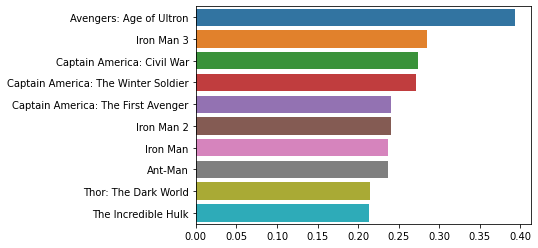

In [10]:
user_liked_movie = 'The Avengers'

movie_index = get_index_from_title(user_liked_movie)
similar_movies = list(enumerate(similarity[movie_index]))
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:11]

top_simiar_movies = {}
for i in sorted_similar_movies:
    top_simiar_movies[get_title_from_index(i[0])] = i[1]
sns.barplot(x=list(top_simiar_movies.values()),y=list(top_simiar_movies.keys()));

# Collaborative Recommender System

In [11]:
## Reading Dataset
import pandas as pd

movies_df  = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

## Merging ID & titles with ratings
df = pd.merge(movies_df,ratings_df,on='movieId').drop(['genres','timestamp'],axis=1)

## Filtering Data (Ignoring Movies with less than 10 ratings, and Users with less than 100 ratings given)
def filter_data(df):
  ### Ratings Per Movie
    ratings_per_movie = df.groupby('movieId')['rating'].count()

  ### Ratings By Each User
    ratings_per_user = df.groupby('userId')['rating'].count()

    ratings_per_movie_df = pd.DataFrame(ratings_per_movie)
    ratings_per_user_df = pd.DataFrame(ratings_per_user)
  ######## Filter Movies (>=10)
    filtered_ratings_per_movie_df = ratings_per_movie_df[ratings_per_movie_df.rating >= 10].index.tolist()

  ########## Filter Users  (>=50)
    filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 100].index.tolist()
    df = df[df.movieId.isin(filtered_ratings_per_movie_df)]
    df = df[df.userId.isin(filtered_ratings_per_user_df)]
    return df

df = filter_data(df)

## PivotTable
userRatings = df.pivot_table(index=['userId'],columns=['title'],values='rating').fillna(0)

## Preparing Correlation Matrix
corrMatrix = userRatings.corr(method='pearson')
corrMatrix

In [12]:
### user Input Movies (Single Movie)
def recommend_movies(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    recommendations = similar_ratings.sort_values(ascending=False)
    return recommendations

## User Input
movie_name = "Pulp Fiction (1994)"
rating = 5
recommendations = recommend_movies(movie_name,rating)
print(recommendations[1:11].sort_values(ascending=False))

title
Goodfellas (1990)                            1.277269
Usual Suspects, The (1995)                   1.211515
American History X (1998)                    1.131007
Reservoir Dogs (1992)                        1.119545
Seven (a.k.a. Se7en) (1995)                  1.113486
Fight Club (1999)                            1.084580
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    1.063703
Trainspotting (1996)                         1.059829
Fargo (1996)                                 1.047534
Silence of the Lambs, The (1991)             0.991004
Name: Pulp Fiction (1994), dtype: float64
